In [2]:
import pandas as pd 
import numpy as np


In [3]:
train_data = pd.read_csv(r'F:\M.Tech_CollgeMaterials\CodeLLM\sentiment_analysis\data\twitter_training.csv')

In [4]:
train_data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [5]:
# First step will assign the data set column names so that it can be easier to perform operations 
column_names = ['id', 'keyword', 'sentiment', 'text']

train_data = pd.read_csv(r'F:\M.Tech_CollgeMaterials\CodeLLM\sentiment_analysis\data\twitter_training.csv',names=column_names)
val_data = pd.read_csv(r'F:\M.Tech_CollgeMaterials\CodeLLM\sentiment_analysis\data\twitter_validation.csv',names=column_names)

In [6]:
train_data.head()

,id,keyword,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [7]:
train_data.isnull().sum()

id             0
keyword        0
sentiment      0
text         686
dtype: int64

In [8]:
train_data = train_data.dropna()


In [9]:
train_data.dtypes

id            int64
keyword      object
sentiment    object
text         object
dtype: object

In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sayed\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sayed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sayed\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
import re

def preprocess(text):
    # Check if the text is a string, if not, return empty string
    if not isinstance(text, str):  
        return ""  # Handle NaN or other non-string values

    # Convert text to lowercase
    text = text.lower()

    # Replace <unk> token with a placeholder (optional, you could remove it)
    text = text.replace("<unk>", "unknown")

    # Remove URLs (replace with 'URL' or just remove)
    text = re.sub(r'http\S+|www\S+|https\S+', 'URL', text)

    # Remove Twitter handles (e.g., @username)
    text = re.sub(r'@\w+', '', text)

    # Remove hashtags (e.g., #example)
    text = re.sub(r'#\w+', '', text)

    # Remove non-alphanumeric characters (except spaces)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords and punctuation
    tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]

    # Lemmatize the tokens (convert to base form)
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Return the preprocessed text as a space-separated string
    return " ".join(tokens)


In [12]:
train_data['text'] = train_data['text'].apply(preprocess)

In [13]:
val_data['text'] = val_data['text'].apply(preprocess)

In [14]:
train_data['sentiment'] = train_data['sentiment'].map({'Negative': 0, 'Positive': 2, 'Neutral': 1, 'Irrelevant': 1})

In [15]:
val_data['sentiment'] = val_data['sentiment'].map({'Negative': 0, 'Positive': 2, 'Neutral': 1, 'Irrelevant': 1})

In [16]:
train_data.head()

,id,keyword,sentiment,text
0,2401,Borderlands,2,im getting borderland murder
1,2401,Borderlands,2,coming border kill
2,2401,Borderlands,2,im getting borderland kill
3,2401,Borderlands,2,im coming borderland murder
4,2401,Borderlands,2,im getting borderland 2 murder


In [17]:
val_data.head()

,id,keyword,sentiment,text
0,3364,Facebook,1,mentioned facebook struggling motivation go ru...
1,352,Amazon,1,bbc news amazon bos jeff bezos reject claim co...
2,8312,Microsoft,0,pay word function poorly chromebook
3,4371,CS-GO,0,csgo matchmaking full closet hacking truly awf...
4,4433,Google,1,president slapping american face really commit...


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer # type: ignore
from tensorflow.keras.preprocessing.sequence import pad_sequences  #type: ignore
from tensorflow.keras.utils import to_categorical  #type: ignore
from tensorflow.keras.models import Sequential    #type: ignore
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout  #type: ignore 


max_words = 10000
max_len = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_data['text'])  

sequences = tokenizer.texts_to_sequences(train_data['text'])
X = pad_sequences(sequences, maxlen=max_len)
y = to_categorical(train_data['sentiment'].values, num_classes=3)

In [19]:
val_data.dtypes

id            int64
keyword      object
sentiment     int64
text         object
dtype: object

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
#LSTM model
model = Sequential()
model.add(Embedding(max_words, 128))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))

In [22]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
X_val = val_data['text']
y_val = val_data['sentiment']
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_val_pad = pad_sequences(X_val_seq, maxlen=max_len)

In [24]:
y_val_onehot = to_categorical(y_val, num_classes=3)


In [25]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val_pad, y_val_onehot))


Epoch 1/10
1850/1850 ━━━━━━━━━━━━━━━━━━━━ 101s 52ms/step - accuracy: 0.5995 - loss: 0.8393 - val_accuracy: 0.8570 - val_loss: 0.4055
Epoch 2/10
1850/1850 ━━━━━━━━━━━━━━━━━━━━ 102s 55ms/step - accuracy: 0.8142 - loss: 0.4615 - val_accuracy: 0.9270 - val_loss: 0.2581
Epoch 3/10
1850/1850 ━━━━━━━━━━━━━━━━━━━━ 107s 58ms/step - accuracy: 0.8656 - loss: 0.3378 - val_accuracy: 0.9280 - val_loss: 0.2184
Epoch 4/10
1850/1850 ━━━━━━━━━━━━━━━━━━━━ 109s 59ms/step - accuracy: 0.8933 - loss: 0.2710 - val_accuracy: 0.9350 - val_loss: 0.2090
Epoch 5/10
1850/1850 ━━━━━━━━━━━━━━━━━━━━ 110s 60ms/step - accuracy: 0.9102 - loss: 0.2259 - val_accuracy: 0.9510 - val_loss: 0.1800
Epoch 6/10
1850/1850 ━━━━━━━━━━━━━━━━━━━━ 110s 60ms/step - accuracy: 0.9239 - loss: 0.1895 - val_accuracy: 0.9530 - val_loss: 0.1965
Epoch 7/10
1850/1850 ━━━━━━━━━━━━━━━━━━━━ 112s 60ms/step - accuracy: 0.9334 - loss: 0.1656 - val_accuracy: 0.9530 - val_loss: 0.1755
Epoch 8/10
1850/1850 ━━━━━━━━━━━━━━━━━━━━ 111s 60ms/step - accuracy: 

In [26]:
model.evaluate(X_test, y_test)


463/463 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8678 - loss: 0.5156


[0.4962070882320404, 0.8719594478607178]

463/463 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step


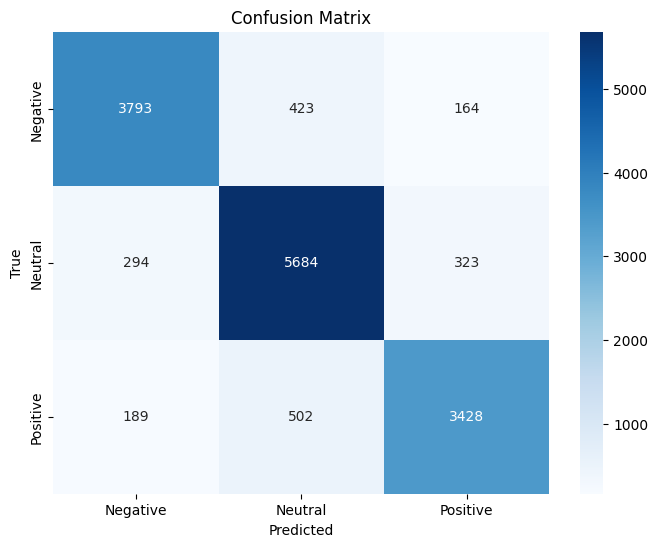

In [29]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns 
y_pred_prob = model.predict(X_test)  # Get predicted probabilities
y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class labels (0, 1, or 2)

# Step 2: Get true labels
y_true = np.argmax(y_test, axis=1)  # Convert one-hot encoded labels to class labels (0, 1, or 2)
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=['Negative', 'Neutral', 'Positive']))

# Calculating individual f1 score for each class 
f1 = f1_score(y_true, y_pred, average=None)
recall = recall_score(y_true, y_pred, average=None)

print(f"F1-Score (per class): {f1}")
print(f"Recall (per class): {recall}")

Classification Report:
              precision    recall  f1-score   support

    Negative       0.89      0.87      0.88      4380
     Neutral       0.86      0.90      0.88      6301
    Positive       0.88      0.83      0.85      4119

    accuracy                           0.87     14800
   macro avg       0.87      0.87      0.87     14800
weighted avg       0.87      0.87      0.87     14800

F1-Score (per class): [0.87638632 0.88055771 0.85337316]
Recall (per class): [0.86598174 0.90207904 0.83224084]


In [ ]:
# Conclusion :
# Model Learned effectively on the training data around 95% achieved by the 10th epoch 
# When evaluated on the test dataset the accuracy achieved is around 87%.
# Out of all the classes the neural provides a better performance of 90%.
